# Shap

[![Index](https://img.shields.io/badge/Index-blue)](../index.ipynb)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/digillia/Digillia-Colab/blob/main/tools/shap.ipynb)


[Shap](https://github.com/shap/shap) fournit une boîte à outils indispensable pour expliquer les modèles d'apprentissage machine, en particulier pour analyser le poids des caractéristiques dans la prédiction pour l'ingénierie des données.

Docs:
- https://github.com/shap/shap
- https://shap.readthedocs.io/

In [1]:
import os
import sys

# Supprimer les commentaires pour installer (requirements.txt)
# !pip3 install -q -U scikit-learn

# À installer dans tous les cas pour Google Colab et Github
if ('google.colab' in sys.modules) or ('CI' in os.environ):
    !pip3 install -q -U shap

In [2]:
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from shap import Explainer, plots

In [3]:
n_samples = 100
n_features = 5
n_informative = 2
noise = 10
random_state = 42

## Régression Linéaire

In [4]:
X, y = make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_informative, noise=noise, random_state=random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
model = LinearRegression()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))
print(model.coef_, model.intercept_)

0.9789999404124572
[-0.18577457 63.56009403  0.70541166 58.26044002  1.70513772] -1.804947022962597


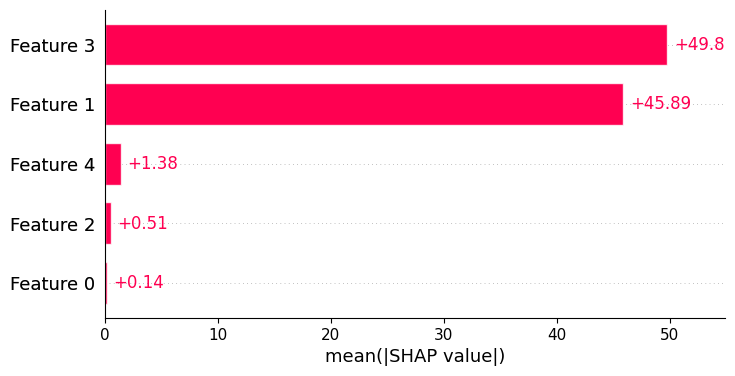

In [5]:
# Calcul des valeurs SHAP pour le modèle linéarie
explainer = Explainer(model.predict, X_train)
shap_values = explainer(X_train)

# Affichage d'un graphe d'importance
plots.bar(shap_values)

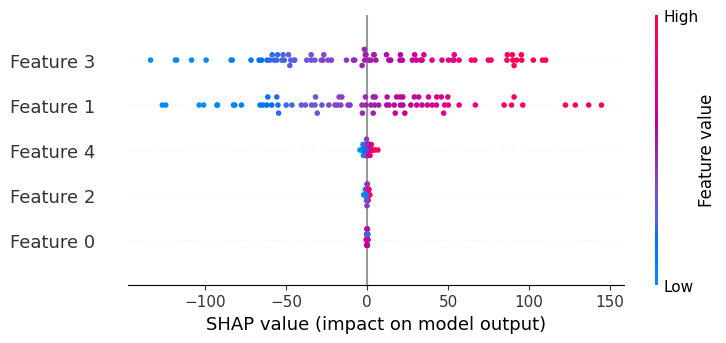

In [6]:
# Affichage d'un graphe d'impact
plots.beeswarm(shap_values)

## Classification par Arbre de Décision

0.88


[Text(0.5, 0.9, 'x[3] <= -0.301\ngini = 0.499\nsamples = 75\nvalue = [39, 36]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(0.6666666666666666, 0.7, 'x[0] <= 1.154\ngini = 0.18\nsamples = 40\nvalue = [4, 36]'),
 Text(0.5, 0.5, 'x[3] <= -0.001\ngini = 0.053\nsamples = 37\nvalue = [1, 36]'),
 Text(0.3333333333333333, 0.3, 'x[0] <= 0.017\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(0.8333333333333334, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

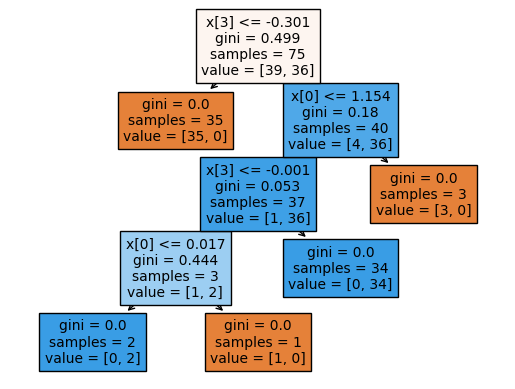

In [7]:
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_informative, random_state=random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))
plot_tree(model, filled=True)

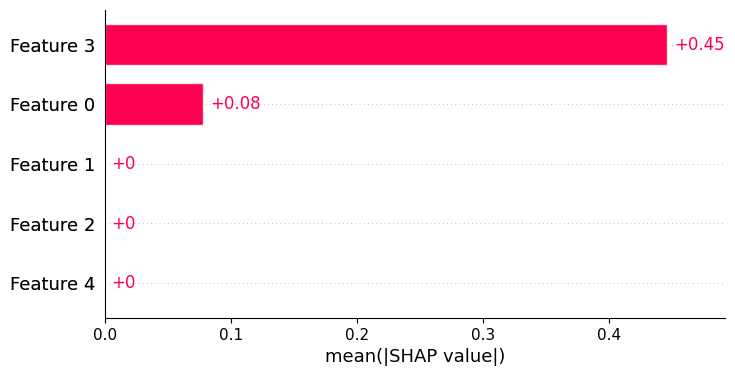

In [8]:
# Calcul des valeurs SHAP pour le modèle de classification
explainer = Explainer(model.predict, X_train)
shap_values = explainer(X_train)

# Affichage d'un graphe d'importance
plots.bar(shap_values)

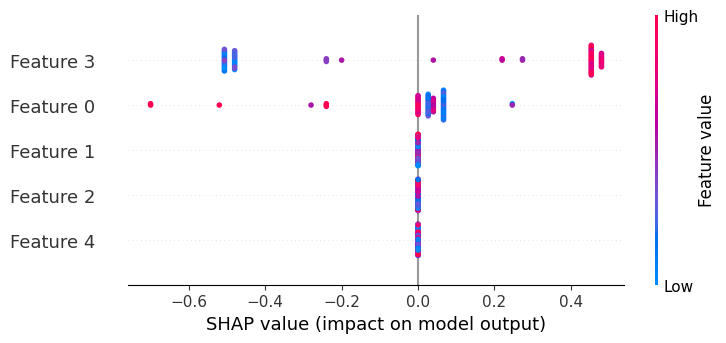

In [9]:
# Affichage d'un graphe d'impact
plots.beeswarm(shap_values)